In [2]:
import pandas as pd
import numpy as np

## Data Exploration

In [3]:

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [5]:
numeric_cars.head(5)


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleaning

In [6]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
numeric_cars=numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
#removing the price null values rows
numeric_cars=numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
#imputing the null values in columns with null values
numeric_cars['normalized-losses']=numeric_cars['normalized-losses'].fillna(numeric_cars['normalized-losses'].mean())
numeric_cars['bore']=numeric_cars['bore'].fillna(numeric_cars['bore'].mean())
numeric_cars['stroke']=numeric_cars['stroke'].fillna(numeric_cars['stroke'].mean())
numeric_cars['horsepower']=numeric_cars['horsepower'].fillna(numeric_cars['horsepower'].mean())
numeric_cars['peak-rpm']=numeric_cars['peak-rpm'].fillna(numeric_cars['peak-rpm'].mean())

numeric_cars.isnull().sum()


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
#normalizing all columns to range from 0 to 1
price_col=numeric_cars['price']
numeric_cars=(numeric_cars-numeric_cars.mean())/numeric_cars.std()

## Univariate model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [12]:
def knn_train_test(train_col,test_col,df):
    
    knn=KNeighborsRegressor()
    np.random.seed(1)
    
    #splitting the dataset and randomizing order of rows
    shuffled_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffled_index)
    
    split_index=int(len(rand_df)/2)
    
    test_set=df.iloc[:split_index]
    train_set=df.iloc[split_index:]
    
    #train
    knn.fit(train_set[[train_col]],train_set[test_col])
    #predict
    test_set['predicted_val']=knn.predict(test_set[[train_col]])
    
    #error
    rmse=mean_squared_error(test_set[test_col],test_set['predicted_val'])**(1/2)
    
    return(rmse)

k_rmse={}
train_col=numeric_cars.columns.drop('price')

for col in train_col:
    rmse_val=knn_train_test(col,'price',numeric_cars)
    k_rmse[col]=rmse_val
    
# Creating a Series object from the dictionary so that we can easily view the results, sort, etc
rmse_results_series = pd.Series(k_rmse)
rmse_results_series.sort_values()
    
    
    
    
    
    
    

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


engine-size          0.629797
city-mpg             0.805169
highway-mpg          0.880623
curb-weight          0.961233
width                0.961785
horsepower           0.983217
length               1.062736
wheel-base           1.154062
bore                 1.157802
compression-rate     1.162749
normalized-losses    1.220002
height               1.293744
stroke               1.321221
peak-rpm             1.508612
dtype: float64

In [15]:
#changing k values


def knn_train_test(train_col,test_col,df):
    k_val=[1,3,5,7,9]
    k_rmse={}
    for i in k_val:
        knn=KNeighborsRegressor(n_neighbors=i)
        np.random.seed(1)
        
        #splitting the dataset and randomizing order of rows
        shuffled_index=np.random.permutation(df.index)
        rand_df=df.reindex(shuffled_index)
        
        split_index=int(len(rand_df)/2)
        
        test_set=df.iloc[:split_index]
        train_set=df.iloc[split_index:]
        
        #train
        knn.fit(train_set[[train_col]],train_set[test_col])
        #predict
        test_set['predicted_val']=knn.predict(test_set[[train_col]])
        
        #error
        rmse=mean_squared_error(test_set[test_col],test_set['predicted_val'])**(1/2)
        
        k_rmse[i]=rmse
        
    return(k_rmse)
    
 
k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results
    


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'bore': {1: 1.1811584904742627,
  3: 1.1568616109712406,
  5: 1.1578016277767238,
  7: 1.161344344127625,
  9: 1.1459244405487408},
 'city-mpg': {1: 1.0205447687155509,
  3: 0.8111497237010712,
  5: 0.8051688481917159,
  7: 0.8208547779523697,
  9: 0.8206939521986804},
 'compression-rate': {1: 1.1818543708008389,
  3: 1.165891550362678,
  5: 1.1627491925633977,
  7: 1.1582660984594764,
  9: 1.218933472593863},
 'curb-weight': {1: 0.9545997725768508,
  3: 0.9865974258446268,
  5: 0.9612330613525184,
  7: 0.9445160990872395,
  9: 0.9476861687308114},
 'engine-size': {1: 0.6058138243660804,
  3: 0.513119594864707,
  5: 0.6297974763041083,
  7: 0.6547616848527711,
  9: 0.7042050249880966},
 'height': {1: 1.4380020608986201,
  3: 1.4041620986235512,
  5: 1.2937439092529104,
  7: 1.24739367471578,
  9: 1.2373473538457034},
 'highway-mpg': {1: 0.8948103329763156,
  3: 0.9291766677343587,
  5: 0.8806227331028261,
  7: 0.8809697040186477,
  9: 0.8903330549977022},
 'horsepower': {1: 0.99186850

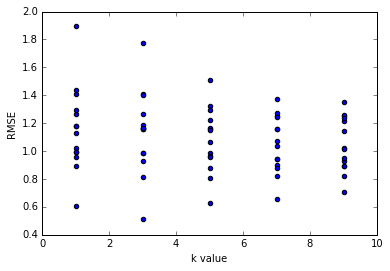

In [18]:
#rmse values declining with higher k value
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate model

In [28]:
# Computing average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse=np.mean(list(v.values()))
    feature_avg_rmse[k]=avg_rmse
series_avg_rmse=pd.Series(feature_avg_rmse)
sorted_series_avg_rmse=series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)
sorted_features=sorted_series_avg_rmse.index

engine-size          0.621540
city-mpg             0.855682
highway-mpg          0.895182
horsepower           0.950615
curb-weight          0.958927
width                1.028881
length               1.053804
bore                 1.160618
wheel-base           1.162450
compression-rate     1.177539
normalized-losses    1.229945
height               1.324130
stroke               1.335046
peak-rpm             1.582704
dtype: float64


In [34]:
def knn_train_test(train_cols,test_col,df):
    
    knn=KNeighborsRegressor()
    np.random.seed(1)
    
    #splitting the dataset and randomizing order of rows
    shuffled_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffled_index)
    
    split_index=int(len(rand_df)/2)
    
    test_set=df.iloc[:split_index]
    train_set=df.iloc[split_index:]
    
    #train
    knn.fit(train_set[train_col],train_set[test_col])
    #predict
    test_set['predicted_val']=knn.predict(test_set[train_col])
    
    #error
    rmse=mean_squared_error(test_set[test_col],test_set['predicted_val'])**(1/2)
    
    return(rmse)

k_rmse_results={}


for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )
k_rmse_results
    
    
    
    
    
    
    

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



{'2 best features': 0.8726294383438977,
 '3 best features': 0.8726294383438977,
 '4 best features': 0.8726294383438977,
 '5 best features': 0.8726294383438977,
 '6 best features': 0.8726294383438977}

## Hyperparameter tuning

In [35]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses



In [36]:
k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 0.4127470765070331,
  2: 0.35481609879249365,
  3: 0.38130140071944113,
  4: 0.38981653530963156,
  5: 0.4069338986386128,
  6: 0.41199064189990764,
  7: 0.4305601919337825,
  8: 0.45017040848522316,
  9: 0.4905798502930193,
  10: 0.5160570926719455,
  11: 0.5340287951826913,
  12: 0.5270546100106663,
  13: 0.5300127989021308,
  14: 0.536677374768655,
  15: 0.5419106338453673,
  16: 0.5455061804199939,
  17: 0.5611341874525563,
  18: 0.5725520830598215,
  19: 0.578980370113992,
  20: 0.5903182071349898,
  21: 0.6021889275851646,
  22: 0.6080012472430607,
  23: 0.6096123623588933,
  24: 0.6171339631525281},
 '3 best features': {1: 0.4201995401172595,
  2: 0.38447038143924295,
  3: 0.38219231012337257,
  4: 0.3901961602667206,
  5: 0.4330771458434965,
  6: 0.4717096665650818,
  7: 0.4846624222373967,
  8: 0.511202775774633,
  9: 0.5327401885433397,
  10: 0.5382138116367869,
  11: 0.5509096835155487,
  12: 0.5513131153133952,
  13: 0.5456990901563489,
  14: 0.53487

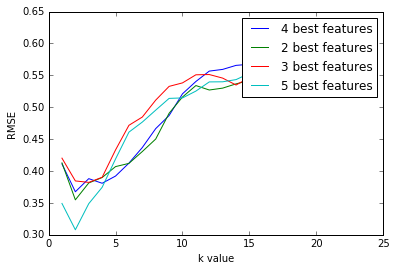

In [37]:

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()